In [1]:
#Iris Dataset - K Means
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # iris dataset
import seaborn as sns

In [2]:
iris_new=load_iris()

In [ ]:
iris_new

In [7]:
#Convert it into df
iris=pd.DataFrame(iris_new.data)

In [8]:
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_new.feature_names # Column Names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# Passing the feature names in Iris DF
iris.columns=iris_new.feature_names

In [11]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
iris.shape

(150, 4)

In [14]:
#Import the K Means
from sklearn.cluster import KMeans

In [21]:
# K Means Classifier

model=KMeans(n_clusters=3)   # N Cluster = 3 because we have 3 types of flowers, default value is 8

In [23]:
model.fit(iris)    # clustering happens with all the columns

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
labels=model.predict(iris)

In [69]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
# Finding the Centroids
centroids = model.cluster_centers_

In [28]:
centroids 

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [29]:
centroid_x=centroids[:,0]
centroid_y=centroids[:,1]

In [30]:
xs=iris_new.data[:,0]
ys=iris_new.data[:,1]

In [31]:
# Plot the clusters with centroid locations

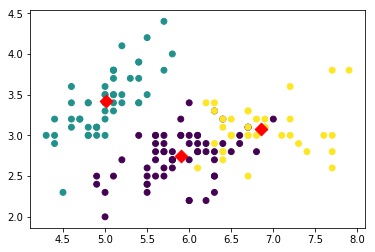

In [42]:
import matplotlib.pyplot as plt
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

In [66]:
# Elbow Method - Find the optimal value of clusters

ks=range(1,6)
intertias=[]               

In [67]:
for k in ks:
    #Define the model
    model=KMeans(n_clusters=k)
    #fit the model
    model.fit(iris)
    #append the inertia
    intertias.append(model.inertia_)

Text(0,0.5,'Inertia')

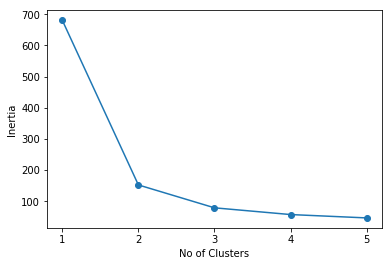

In [68]:
plt.plot(ks,intertias,"-o")
plt.xlabel("No of Clusters")
plt.xticks(ks)
plt.ylabel("Inertia")

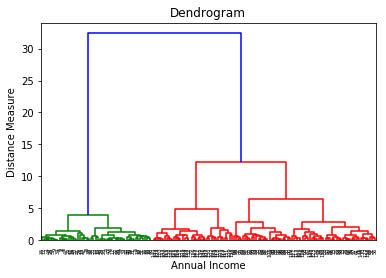

In [126]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(iris,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Annual Income")
plt.ylabel("Distance Measure")
plt.show()

# Auto Mpg Dataset

In [75]:
cars=pd.read_csv("car-mpg.csv")

In [76]:
cars.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [78]:
cars.shape

(398, 10)

In [79]:
cars.drop(columns='car_type',inplace=True)

In [82]:
cars.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [84]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [87]:
cars.replace('?',np.nan,inplace=True)

In [88]:
cars[cars.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [90]:
cars.hp.fillna(cars.hp.median(),inplace=True)

In [92]:
cars.hp=cars.hp.astype('float64')

In [110]:
cars.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

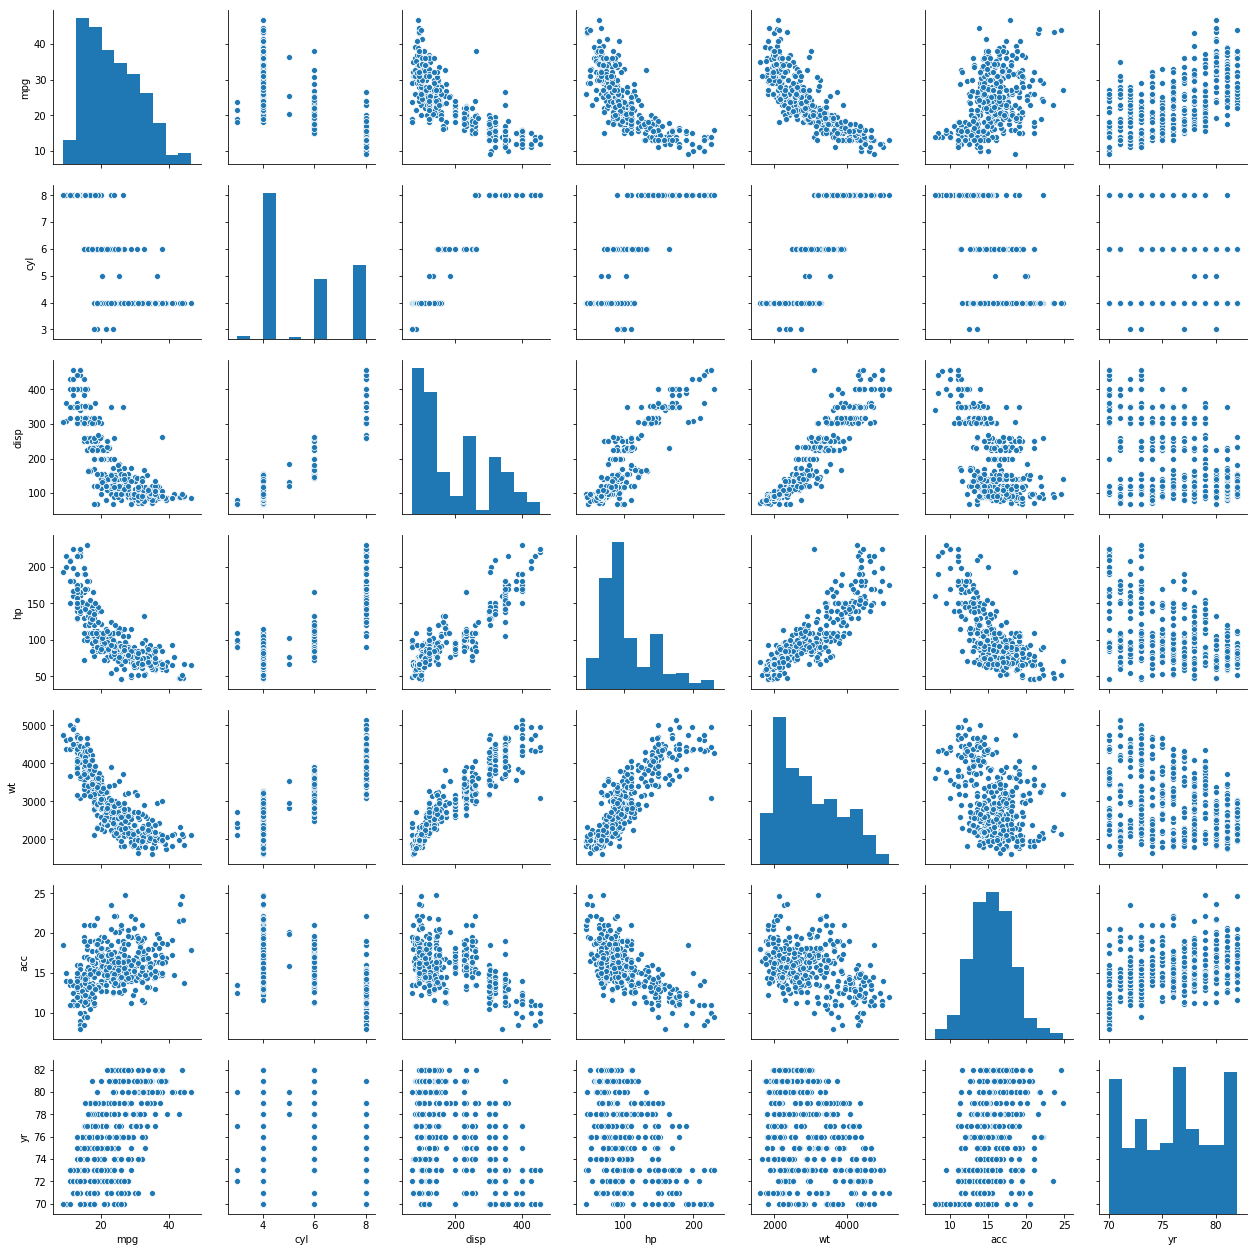

In [95]:
sns.pairplot(cars.iloc[:,0:7])

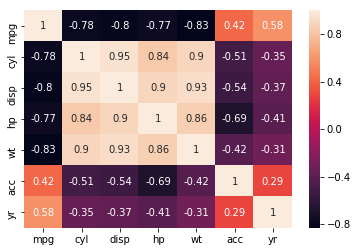

In [116]:
sns.heatmap(cars.iloc[:,0:7].corr(),annot=True)

In [98]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,NaN,NaN,NaN,104.304,38.2226,46,76,93.5,125,230
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,NaN,NaN,NaN,1.57286,0.802055,1,1,1,2,3
car_name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
ks=range(1,10)
intertias=[]
for k in ks:
    #Define the model
    model=KMeans(n_clusters=k)
    #fit the model
    model.fit(cars.iloc[:,0:7])
    #append the inertia
    intertias.append(model.inertia_)

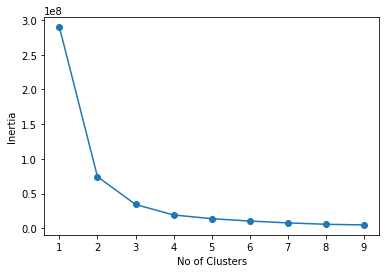

In [107]:
plt.plot(ks,intertias,"-o")
plt.xlabel("No of Clusters")
plt.xticks(ks)
plt.ylabel("Inertia")
plt.show()

In [108]:
model=KMeans(n_clusters=4) 
model.fit(cars.iloc[:,0:7])
labels=model.predict(cars.iloc[:,0:7])
labels

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 2, 2, 2, 2, 0, 0, 0, 0, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 3, 0, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 0, 2, 2, 2, 2, 3, 0, 0,
       0, 0, 0, 3, 0, 2, 2, 0, 0, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 0, 3, 0,
       3, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 2, 2, 2, 2, 1, 1, 3, 3, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 3, 1, 2, 1, 3, 1, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 0, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 2, 0, 3, 0, 0, 3, 3, 3, 0, 3, 1, 3, 1, 0, 0, 1, 3, 3, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 3, 1, 1, 1, 1,

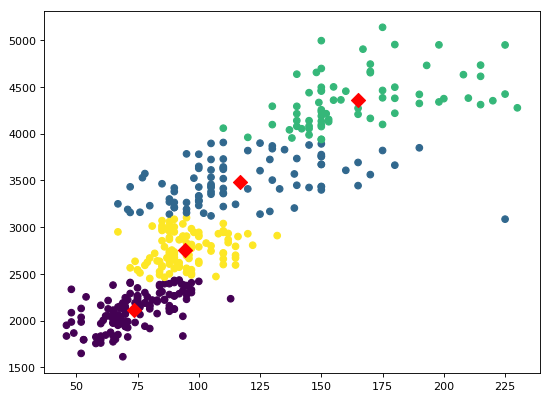

In [125]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

centroids = model.cluster_centers_
centroid_x=centroids[:,3]
centroid_y=centroids[:,4]
xs=cars.iloc[:,3]
ys=cars.iloc[:,4]

plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.show()

In [122]:
x=[[-1,2,3]]
y=[[4,0,-3]]

In [120]:
from sklearn.metrics.pairwise import euclidean_distances

In [123]:
euclidean_distances(x,y)

array([[8.06225775]])